Manasi Jadhav<br> 72030836E<br> 23213<br>

**Practical 5** <br>
Part 1: Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/DSBDA prac/Datasets/Social_Network_Ads.csv')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
data.shape

(400, 5)

In [11]:
data.size

2000

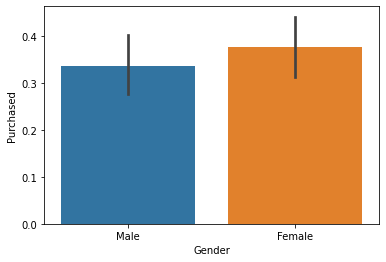

In [12]:
sn.barplot(x = 'Gender', y = 'Purchased', data= data)

In [13]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


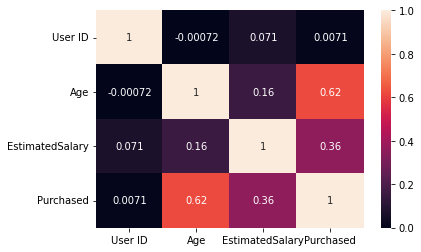

In [14]:
sn.heatmap(data.corr(), annot = True)

In [15]:
df = pd.get_dummies(data, columns = ['Gender'], drop_first= True)

In [16]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df[['User ID','Age','EstimatedSalary','Gender_Male']]
y = df['Purchased']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
regressor = LogisticRegression()

In [22]:
regressor.fit(X_train, y_train)

LogisticRegression()

In [23]:
predictions = regressor.predict(X_test)

Part 2: Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[54  4]
 [ 9 13]]


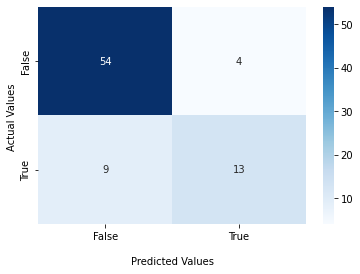

In [26]:
import seaborn as sns

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.76      0.59      0.67        22

    accuracy                           0.84        80
   macro avg       0.81      0.76      0.78        80
weighted avg       0.83      0.84      0.83        80

